In [29]:
# Initialisation

#q1 of ass1

import numpy as np
import math
import torch as t
import torch 

%matplotlib inline
# import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

# dataset loading:
training_data = datasets.FashionMNIST(
    root="../data/",
    train=True,
    download=True,
    transform=ToTensor()
    
)

# note that ToTensor not just converts the image into a tensor but also normalises its intensity in range 0 to 1



test_data = datasets.FashionMNIST(
    root="../data/",
    train=False,
    download=True,
    transform=ToTensor()
)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


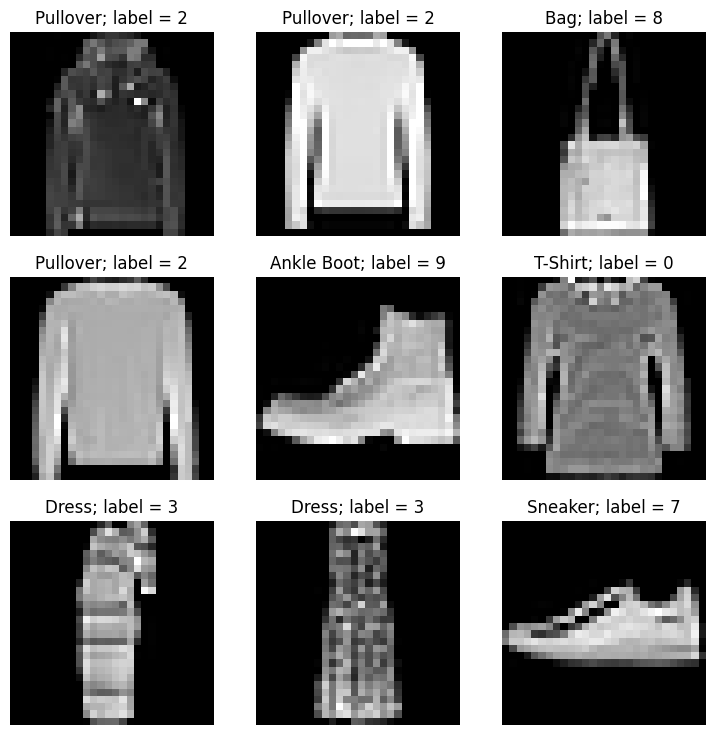

In [27]:
# visualising training dataset
# this code shows random 9 points from the dataset

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(9, 9))
# figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()

    # data is already labelled
    img, label = training_data[sample_idx]
    
    # print(type(img))
    
    # label is a number from 0 to 9

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label]+f"; label = {label}")

    # removes the axis (comment this and try)
    plt.axis("off")

    if 2:
        # use at least one of these 2:
        # (comment one and try)

        # draws current image on the plot
        # plt.imshow(img.squeeze())

        # converts image to grayscale before drawing it 
        plt.imshow(img.squeeze(), cmap="gray")

    
    # displays current plot in currnet stage , so plot will be displayed in different loop iterations , as well as each image overwrites the last on the plot
    # Uncomment and try
    # plt.show()

    
plt.show()

In [30]:
# loading data
batchSize=32
train_dataloader = DataLoader(training_data, batch_size=batchSize, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batchSize, shuffle=True)

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


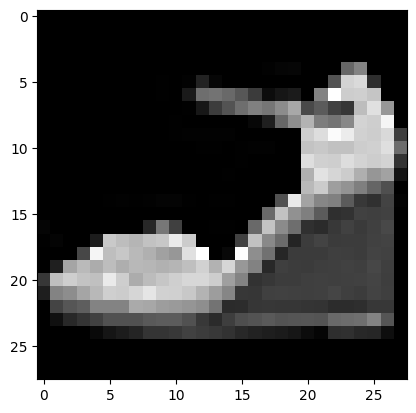

Label: 5


In [31]:
# Display image and label.

# iter converts the dataloader into an iterable
# next fetches the next value
train_features, train_labels = next(iter(train_dataloader))

# feature tensor size is batchSize X 1 X resolution of image (28X28)
print(f"Feature batch shape: {train_features.size()}")

# labels tensor size is  batchSize
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [33]:
ds = datasets.FashionMNIST(
    root="../data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# about the transform:
# this is one off k encoding scheme, also called one hot encoding
target_transform=Lambda( #calls the Lamda function 
    lambda y: torch.zeros(10, dtype=torch.float) #creates a tensor of all zeroes 
    .scatter_(0,                #dimension along which to scatter. heere 0 means 1st dimension
    torch.tensor(y), value=1)) #puts a 1 at the index given by value of y
